In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('balance-scale2.csv')
data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Class'] = encoder.fit_transform(data['Class'])
data.head()


,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [10]:
data.columns

Index(['Class', 'L-Weight', 'L-Distance', 'R-Weight', 'R-Distance'], dtype='object')

In [11]:
x = data[['L-Weight', 'L-Distance', 'R-Weight', 'R-Distance']]
y = data ['Class'].values.reshape(-1,1)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for k in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  acc.append(accuracy_score(y_test, preds))
acc


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

[0.816, 0.736, 0.792, 0.8, 0.824, 0.872, 0.88, 0.872, 0.888, 0.896]

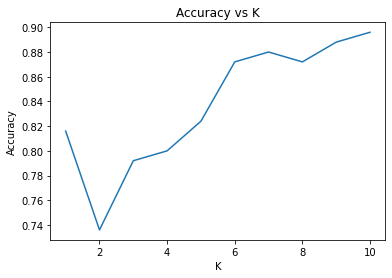

In [14]:
plt.plot([i for i in range(1, 11)], acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()


In [15]:
acc = np.array(acc)
np.argmax(acc)


9

In [16]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
preds = model.predict(x_test)


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds, labels=[1, 0])
print(cm)


[[58  0]
 [ 7  0]]


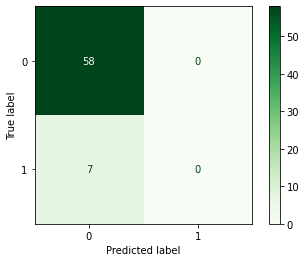

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(cm)
display.plot(cmap="Greens")